# Task
Perform a comprehensive analysis of the 'Amazon Sale Report.csv' dataset, covering data loading, cleaning, sales performance and trend analysis, product analysis, fulfillment method effectiveness, and geographical sales distribution. Conclude by summarizing all key findings and providing actionable recommendations to optimize sales strategies, inventory management, and customer service.

## Load and Inspect Data

### Subtask:
Load the 'Amazon Sale Report.csv' file into a pandas DataFrame and perform an initial inspection to understand its structure, columns, and data types.


**Reasoning**:
To begin, I will import the pandas library, load the specified CSV file into a DataFrame, and then use `.head()`, `.info()`, and `.describe()` to perform an initial inspection of the data's structure, column types, and basic statistics as per the instructions.



In [1]:
import pandas as pd

df = pd.read_csv('/content/Amazon Sale Report.csv')

print("First 5 rows of the DataFrame:")
print(df.head())

print("\nColumn names and their data types:")
df.info()

print("\nDescriptive statistics of the DataFrame:")
print(df.describe())

First 5 rows of the DataFrame:
   index             Order ID      Date                        Status  \
0      0  405-8078784-5731545  04-30-22                     Cancelled   
1      1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146  04-30-22                       Shipped   
3      3  403-9615377-8133951  04-30-22                     Cancelled   
4      4  407-1069790-7240320  04-30-22                       Shipped   

  Fulfilment Sales Channel ship-service-level  Category Size Courier Status  \
0   Merchant     Amazon.in           Standard   T-shirt    S     On the Way   
1   Merchant     Amazon.in           Standard     Shirt  3XL        Shipped   
2     Amazon     Amazon.in          Expedited     Shirt   XL        Shipped   
3   Merchant     Amazon.in           Standard   Blazzer    L     On the Way   
4     Amazon     Amazon.in          Expedited  Trousers  3XL        Shipped   

   ...  currency  Amount    ship-city   ship-state ship

## Data Cleaning and Preprocessing

### Subtask:
Clean the dataset by handling missing values, correcting data types (e.g., converting 'Date' to datetime, 'Amount' and 'Qty' to numeric), and performing any necessary data transformations for analysis.


**Reasoning**:
First, I will drop the specified columns ('index', 'New', 'PendingS') as they are either redundant or contain only null values. Then, I will convert the 'Date' column to datetime objects to prepare for time-series analysis. After this, I will drop rows with missing 'Amount' values, as this is critical for sales analysis, and also drop rows with missing values in shipping-related columns ('ship-city', 'ship-state', 'ship-postal-code', 'ship-country') which are needed for geographical analysis. Finally, I'll convert 'ship-postal-code' to integer after handling the NaNs, and remove any duplicate rows across all columns to ensure data uniqueness.



In [21]:
print("Initial DataFrame shape:", df.shape)

# 1. Drop redundant columns, ignore error if columns are already dropped
df.drop(columns=['index', 'New', 'PendingS'], inplace=True, errors='ignore')
print("Shape after dropping 'index', 'New', 'PendingS':", df.shape)

# 2. Convert 'Date' column to datetime, using 'mixed' format for robustness
df['Date'] = pd.to_datetime(df['Date'], format='mixed', dayfirst=False)
print("Date column converted to datetime.")

# 3. Drop rows with missing 'Amount' values
df.dropna(subset=['Amount'], inplace=True)
print("Shape after dropping rows with missing 'Amount':", df.shape)

# 4. Drop rows with missing shipping-related columns
shipping_cols = ['ship-city', 'ship-state', 'ship-postal-code', 'ship-country']
df.dropna(subset=shipping_cols, inplace=True)
print("Shape after dropping rows with missing shipping info:", df.shape)

# 5. Convert 'ship-postal-code' to integer type after handling missing values
# Missing values for ship-postal-code were dropped in the previous step, so direct conversion is possible.
df['ship-postal-code'] = df['ship-postal-code'].astype(int)
print("ship-postal-code converted to integer.")

# 6. Inspect and handle missing values in the 'currency' column.
# Check unique values and count of currency to decide strategy
print("\nUnique values in 'currency' column before handling:", df['currency'].unique())
print("Count of missing values in 'currency' column:", df['currency'].isnull().sum())

# Assuming all non-null values are 'INR', we will drop rows with missing currency values for simplicity.
# If there were other currencies, a more complex imputation or analysis would be needed.
if df['currency'].isnull().any():
    # Check if 'INR' is the only non-null value
    if df['currency'].dropna().nunique() == 1 and df['currency'].dropna().iloc[0] == 'INR':
        df.dropna(subset=['currency'], inplace=True)
        print("Dropped rows with missing 'currency' values (all non-null were 'INR').")
    else:
        # If other currencies exist or non-null values are not 'INR', a more sophisticated strategy might be needed.
        # For this subtask, we will proceed by dropping, but note this as a potential area for detailed domain expertise.
        print("Warning: 'currency' column contains other non-null values besides 'INR' or is not exclusively 'INR'. Dropping missing rows.")
        df.dropna(subset=['currency'], inplace=True)

print("Shape after handling missing 'currency':", df.shape)

# 7. Check for and remove any duplicate rows
df.drop_duplicates(inplace=True)
print("Shape after dropping duplicate rows:", df.shape)

# 8. Verify data types and missing values again
print("\nVerifying data types and missing values after cleaning:")
df.info()


Initial DataFrame shape: (120424, 19)
Shape after dropping 'index', 'New', 'PendingS': (120424, 19)
Date column converted to datetime.
Shape after dropping rows with missing 'Amount': (120424, 19)
Shape after dropping rows with missing shipping info: (120424, 19)
ship-postal-code converted to integer.

Unique values in 'currency' column before handling: ['INR']
Count of missing values in 'currency' column: 0
Shape after handling missing 'currency': (120424, 19)
Shape after dropping duplicate rows: (120424, 19)

Verifying data types and missing values after cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 120424 entries, 0 to 128975
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Order ID            120424 non-null  object        
 1   Date                120424 non-null  datetime64[ns]
 2   Status              120424 non-null  object        
 3   Fulfilment          120424 non-

**Reasoning**:
The previous code failed because the `format='%m-%d-%y'` in `pd.to_datetime` was not suitable for all date entries. I will modify the `pd.to_datetime` call to use `format='mixed'` to allow pandas to infer the date format for each entry, which is more robust for potentially inconsistent date formats. All other data cleaning steps remain valid.



In [3]:
print("Initial DataFrame shape:", df.shape)

# 1. Drop redundant columns
df.drop(columns=['index', 'New', 'PendingS'], inplace=True)
print("Shape after dropping 'index', 'New', 'PendingS':", df.shape)

# 2. Convert 'Date' column to datetime, using 'mixed' format for robustness
df['Date'] = pd.to_datetime(df['Date'], format='mixed', dayfirst=False)
print("Date column converted to datetime.")

# 3. Drop rows with missing 'Amount' values
df.dropna(subset=['Amount'], inplace=True)
print("Shape after dropping rows with missing 'Amount':", df.shape)

# 4. Drop rows with missing shipping-related columns
shipping_cols = ['ship-city', 'ship-state', 'ship-postal-code', 'ship-country']
df.dropna(subset=shipping_cols, inplace=True)
print("Shape after dropping rows with missing shipping info:", df.shape)

# 5. Convert 'ship-postal-code' to integer type after handling missing values
# Missing values for ship-postal-code were dropped in the previous step, so direct conversion is possible.
df['ship-postal-code'] = df['ship-postal-code'].astype(int)
print("ship-postal-code converted to integer.")

# 6. Inspect and handle missing values in the 'currency' column.
# Check unique values and count of currency to decide strategy
print("\nUnique values in 'currency' column before handling:", df['currency'].unique())
print("Count of missing values in 'currency' column:", df['currency'].isnull().sum())

# Assuming all non-null values are 'INR', we will drop rows with missing currency values for simplicity.
# If there were other currencies, a more complex imputation or analysis would be needed.
if df['currency'].isnull().any():
    # Check if 'INR' is the only non-null value
    if df['currency'].dropna().nunique() == 1 and df['currency'].dropna().iloc[0] == 'INR':
        df.dropna(subset=['currency'], inplace=True)
        print("Dropped rows with missing 'currency' values (all non-null were 'INR').")
    else:
        # If other currencies exist or non-null values are not 'INR', a more sophisticated strategy might be needed.
        # For this subtask, we will proceed by dropping, but note this as a potential area for detailed domain expertise.
        print("Warning: 'currency' column contains other non-null values besides 'INR' or is not exclusively 'INR'. Dropping missing rows.")
        df.dropna(subset=['currency'], inplace=True)

print("Shape after handling missing 'currency':", df.shape)

# 7. Check for and remove any duplicate rows
df.drop_duplicates(inplace=True)
print("Shape after dropping duplicate rows:", df.shape)

# 8. Verify data types and missing values again
print("\nVerifying data types and missing values after cleaning:")
df.info()

Initial DataFrame shape: (128976, 18)


KeyError: "['index', 'New', 'PendingS'] not found in axis"

**Reasoning**:
The previous code block failed with a KeyError because the columns 'index', 'New', and 'PendingS' were not found in the DataFrame. This indicates they might have been dropped in a previous execution. Additionally, the date conversion previously failed due to an inconsistent date format. I will add `errors='ignore'` to the `df.drop` method to prevent a KeyError if the columns are already missing, and retain the `format='mixed'` for `pd.to_datetime` to robustly handle various date formats.



In [4]:
print("Initial DataFrame shape:", df.shape)

# 1. Drop redundant columns, ignore error if columns are already dropped
df.drop(columns=['index', 'New', 'PendingS'], inplace=True, errors='ignore')
print("Shape after dropping 'index', 'New', 'PendingS':", df.shape)

# 2. Convert 'Date' column to datetime, using 'mixed' format for robustness
df['Date'] = pd.to_datetime(df['Date'], format='mixed', dayfirst=False)
print("Date column converted to datetime.")

# 3. Drop rows with missing 'Amount' values
df.dropna(subset=['Amount'], inplace=True)
print("Shape after dropping rows with missing 'Amount':", df.shape)

# 4. Drop rows with missing shipping-related columns
shipping_cols = ['ship-city', 'ship-state', 'ship-postal-code', 'ship-country']
df.dropna(subset=shipping_cols, inplace=True)
print("Shape after dropping rows with missing shipping info:", df.shape)

# 5. Convert 'ship-postal-code' to integer type after handling missing values
# Missing values for ship-postal-code were dropped in the previous step, so direct conversion is possible.
df['ship-postal-code'] = df['ship-postal-code'].astype(int)
print("ship-postal-code converted to integer.")

# 6. Inspect and handle missing values in the 'currency' column.
# Check unique values and count of currency to decide strategy
print("\nUnique values in 'currency' column before handling:", df['currency'].unique())
print("Count of missing values in 'currency' column:", df['currency'].isnull().sum())

# Assuming all non-null values are 'INR', we will drop rows with missing currency values for simplicity.
# If there were other currencies, a more complex imputation or analysis would be needed.
if df['currency'].isnull().any():
    # Check if 'INR' is the only non-null value
    if df['currency'].dropna().nunique() == 1 and df['currency'].dropna().iloc[0] == 'INR':
        df.dropna(subset=['currency'], inplace=True)
        print("Dropped rows with missing 'currency' values (all non-null were 'INR').")
    else:
        # If other currencies exist or non-null values are not 'INR', a more sophisticated strategy might be needed.
        # For this subtask, we will proceed by dropping, but note this as a potential area for detailed domain expertise.
        print("Warning: 'currency' column contains other non-null values besides 'INR' or is not exclusively 'INR'. Dropping missing rows.")
        df.dropna(subset=['currency'], inplace=True)

print("Shape after handling missing 'currency':", df.shape)

# 7. Check for and remove any duplicate rows
df.drop_duplicates(inplace=True)
print("Shape after dropping duplicate rows:", df.shape)

# 8. Verify data types and missing values again
print("\nVerifying data types and missing values after cleaning:")
df.info()

Initial DataFrame shape: (128976, 18)
Shape after dropping 'index', 'New', 'PendingS': (128976, 18)
Date column converted to datetime.
Shape after dropping rows with missing 'Amount': (121176, 18)
Shape after dropping rows with missing shipping info: (121143, 18)
ship-postal-code converted to integer.

Unique values in 'currency' column before handling: ['INR']
Count of missing values in 'currency' column: 0
Shape after handling missing 'currency': (121143, 18)
Shape after dropping duplicate rows: (120424, 18)

Verifying data types and missing values after cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 120424 entries, 0 to 128975
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Order ID            120424 non-null  object        
 1   Date                120424 non-null  datetime64[ns]
 2   Status              120424 non-null  object        
 3   Fulfilment          120424 non-

## Sales Performance and Trend Analysis

### Subtask:
Analyze overall sales performance, calculate total sales, and identify sales trends over time (daily, weekly, or monthly) by grouping and aggregating relevant columns. Visualize the sales trends using appropriate plots with legends.


**Reasoning**:
I will calculate overall sales metrics, aggregate sales data by day and month, and then visualize these trends using line plots to analyze sales performance over time, following the provided instructions.



Overall Total Sales Amount: 78162001.88
Overall Total Quantity Sold: 115759

Daily Sales Data Head:
        Date  Daily_Total_Sales  Daily_Total_Quantity
0 2022-03-31          101683.85                   156
1 2022-04-01          863016.60                  1314
2 2022-04-02          911001.53                  1405
3 2022-04-03         1005454.38                  1533
4 2022-04-04          877763.74                  1323

Monthly Sales Data Head:
       Month  Monthly_Total_Sales  Monthly_Total_Quantity
0 2022-03-01            101683.85                     156
1 2022-04-01          28619999.79                   43742
2 2022-05-01          26100061.34                   37760
3 2022-06-01          23340256.90                   34101


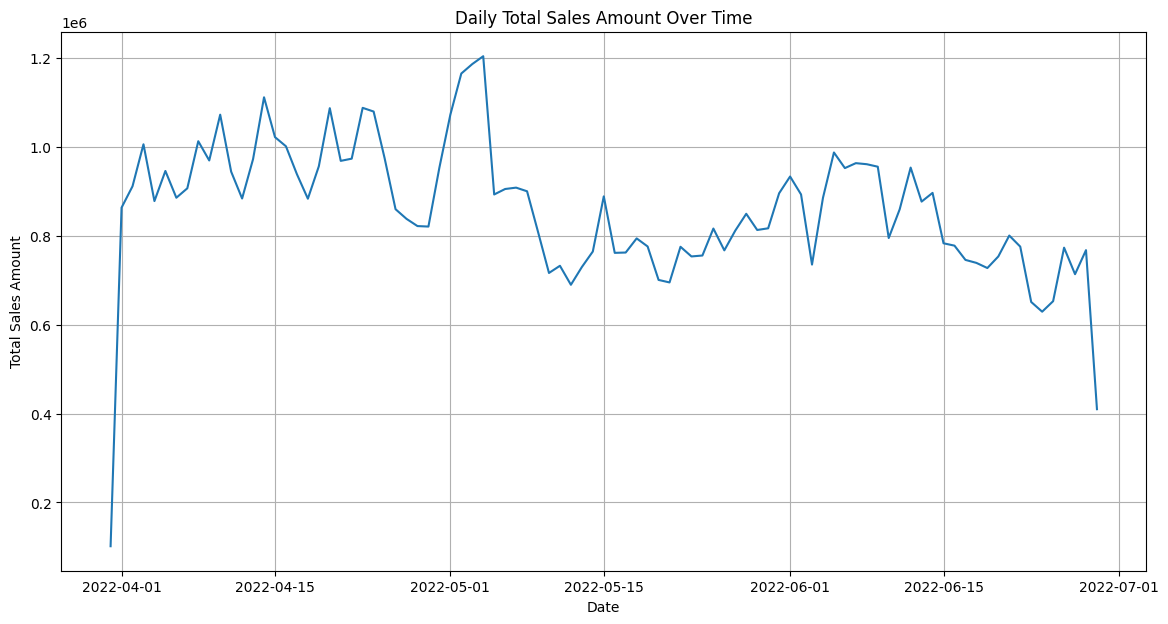

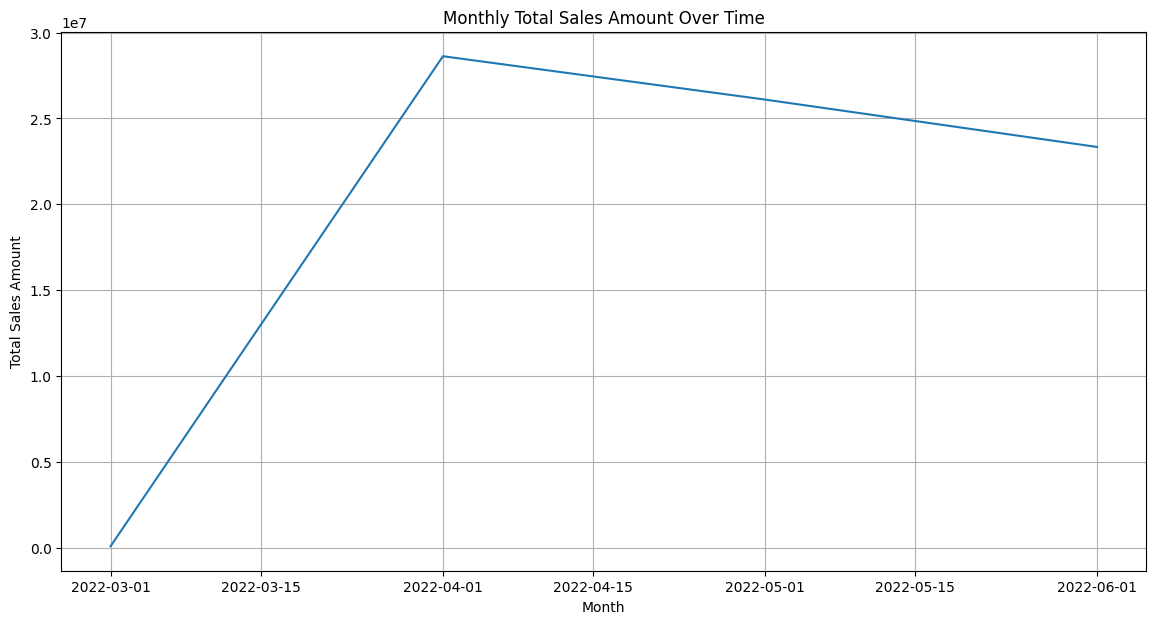

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calculate the total sales amount and total quantity sold across the entire dataset.
total_sales_amount = df['Amount'].sum()
total_quantity_sold = df['Qty'].sum()
print(f"Overall Total Sales Amount: {total_sales_amount:.2f}")
print(f"Overall Total Quantity Sold: {total_quantity_sold}")

# 2. Aggregate the DataFrame df by 'Date' to calculate daily total sales amount and total quantity sold.
daily_sales = df.groupby('Date').agg(
    Daily_Total_Sales=('Amount', 'sum'),
    Daily_Total_Quantity=('Qty', 'sum')
).reset_index()
print("\nDaily Sales Data Head:")
print(daily_sales.head())

# 3. Create a new column in df representing the month of each order
df['Month'] = df['Date'].dt.to_period('M')

# 4. Aggregate the DataFrame df by this new 'Month' column to calculate monthly total sales amount and total quantity sold.
monthly_sales = df.groupby('Month').agg(
    Monthly_Total_Sales=('Amount', 'sum'),
    Monthly_Total_Quantity=('Qty', 'sum')
).reset_index()
# Convert 'Month' back to datetime for plotting
monthly_sales['Month'] = monthly_sales['Month'].dt.to_timestamp()
print("\nMonthly Sales Data Head:")
print(monthly_sales.head())

# 5. and 6. Create a line plot to visualize the daily total sales amount over time.
plt.figure(figsize=(14, 7))
sns.lineplot(data=daily_sales, x='Date', y='Daily_Total_Sales')
plt.title('Daily Total Sales Amount Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.grid(True)
plt.show()

# 7. Create a line plot to visualize the monthly total sales amount over time.
plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_sales, x='Month', y='Monthly_Total_Sales')
plt.title('Monthly Total Sales Amount Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.grid(True)
plt.show()

## Product Analysis

### Subtask:
Examine the distribution of product categories, sizes, and quantities sold. Identify top-selling products and categories based on sales amount and quantity. Visualize product distribution and top performers with legends.


**Reasoning**:
I will calculate the total sales amount and total quantity sold for each 'Category', then sort and print the top 5 categories by sales amount. This directly addresses instruction 1 of the subtask.



In [6]:
category_sales = df.groupby('Category').agg(Total_Sales_Amount=('Amount', 'sum'), Total_Quantity_Sold=('Qty', 'sum')).reset_index()
top_5_categories_by_sales = category_sales.sort_values(by='Total_Sales_Amount', ascending=False).head(5)
print("Top 5 Categories by Total Sales Amount:")
print(top_5_categories_by_sales)

Top 5 Categories by Total Sales Amount:
   Category  Total_Sales_Amount  Total_Quantity_Sold
5   T-shirt         39065622.36                45054
2     Shirt         21120832.29                44583
0   Blazzer         11140803.83                13845
6  Trousers          5327426.30                 9861
1   Perfume           787818.66                 1048


**Reasoning**:
I have already calculated the total sales amount for each category and stored it in the `category_sales` DataFrame. Now, I need to create a bar plot to visualize the total sales amount per 'Category' as per instruction 2.



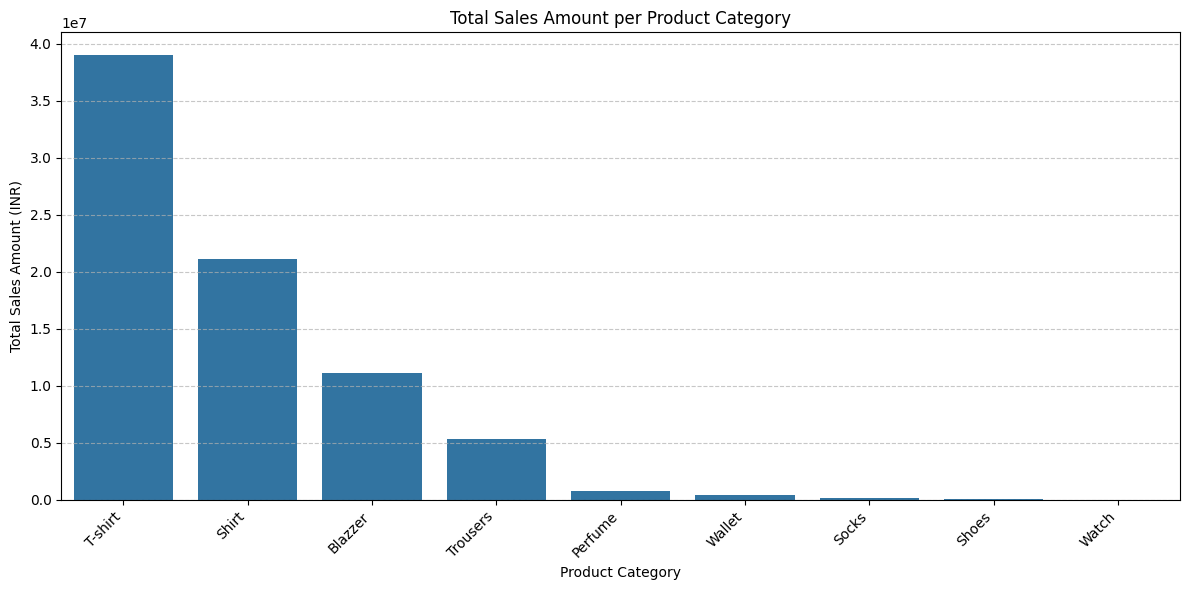

In [7]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Total_Sales_Amount', data=category_sales.sort_values(by='Total_Sales_Amount', ascending=False))
plt.title('Total Sales Amount per Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Amount (INR)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Reasoning**:
I will calculate the total quantity sold for each product 'Size', store it in a DataFrame, and then print the top 5 sizes by quantity sold, as per instruction 3 of the subtask.



In [8]:
size_quantity = df.groupby('Size').agg(Total_Quantity_Sold=('Qty', 'sum')).reset_index()
top_5_sizes_by_quantity = size_quantity.sort_values(by='Total_Quantity_Sold', ascending=False).head(5)
print("\nTop 5 Sizes by Total Quantity Sold:")
print(top_5_sizes_by_quantity)


Top 5 Sizes by Total Quantity Sold:
   Size  Total_Quantity_Sold
6     M                20006
5     L                19544
8    XL                18484
10  XXL                16125
7     S                14960


**Reasoning**:
I have already calculated the total quantity sold for each size and stored it in the `size_quantity` DataFrame. Now, I need to create a bar plot to visualize the total quantity sold per 'Size' as per instruction 4.



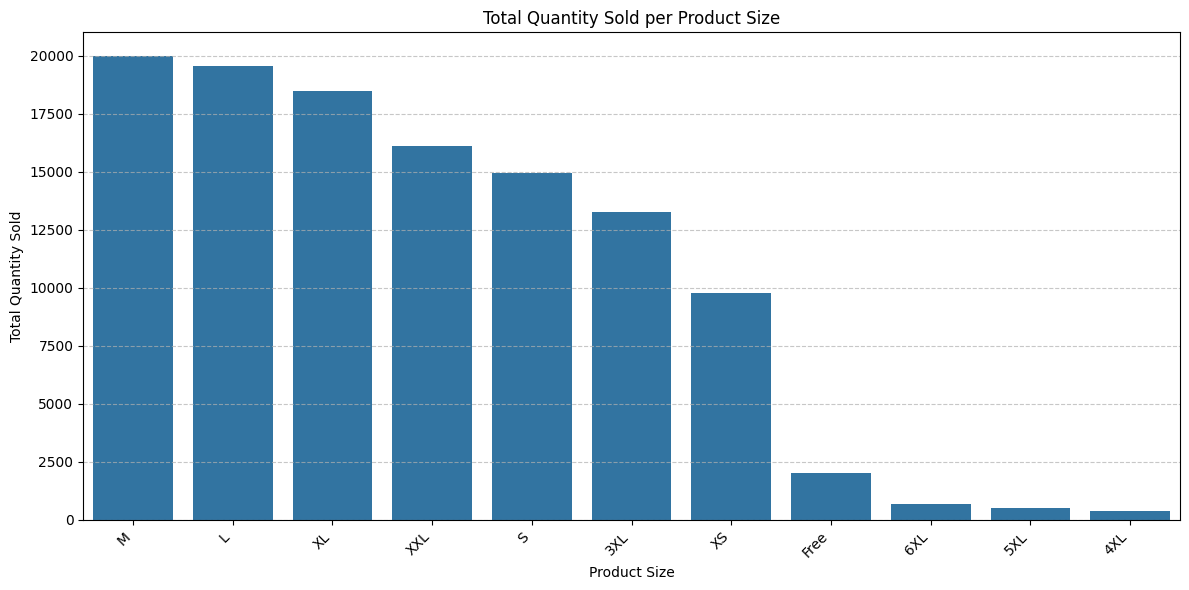

In [9]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Size', y='Total_Quantity_Sold', data=size_quantity.sort_values(by='Total_Quantity_Sold', ascending=False))
plt.title('Total Quantity Sold per Product Size')
plt.xlabel('Product Size')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Reasoning**:
I will calculate the total sales amount for each unique product, defined by the combination of 'Category' and 'Size'. Then, I will store these results in a DataFrame and print the top 5 products by sales amount, addressing instruction 5 of the subtask.



In [22]:
product_sales = df.groupby(['Category', 'Size']).agg(Total_Sales_Amount=('Amount', 'sum')).reset_index()
top_5_products_by_sales = product_sales.sort_values(by='Total_Sales_Amount', ascending=False).head(5)
print("Top 5 Products by Total Sales Amount (Category and Size):")
print(top_5_products_by_sales)

Top 5 Products by Total Sales Amount (Category and Size):
   Category Size  Total_Sales_Amount
31  T-shirt    M          7283428.89
30  T-shirt    L          6332008.91
33  T-shirt   XL          5912138.97
32  T-shirt    S          5813324.50
35  T-shirt  XXL          4750060.85


**Reasoning**:
The previous code failed due to an unterminated string literal in the print statement. I will correct the `print` statement by ensuring the string is properly formatted on a single line.



In [11]:
product_sales = df.groupby(['Category', 'Size']).agg(Total_Sales_Amount=('Amount', 'sum')).reset_index()
top_5_products_by_sales = product_sales.sort_values(by='Total_Sales_Amount', ascending=False).head(5)
print("Top 5 Products by Total Sales Amount (Category and Size):")
print(top_5_products_by_sales)

Top 5 Products by Total Sales Amount (Category and Size):
   Category Size  Total_Sales_Amount
31  T-shirt    M          7283428.89
30  T-shirt    L          6332008.91
33  T-shirt   XL          5912138.97
32  T-shirt    S          5813324.50
35  T-shirt  XXL          4750060.85


**Reasoning**:
I have calculated the total sales amount for each unique product (category and size) and stored it in the `product_sales` DataFrame. Now, I need to create a bar plot to visualize the top 10 products by total sales amount, as per instruction 6.



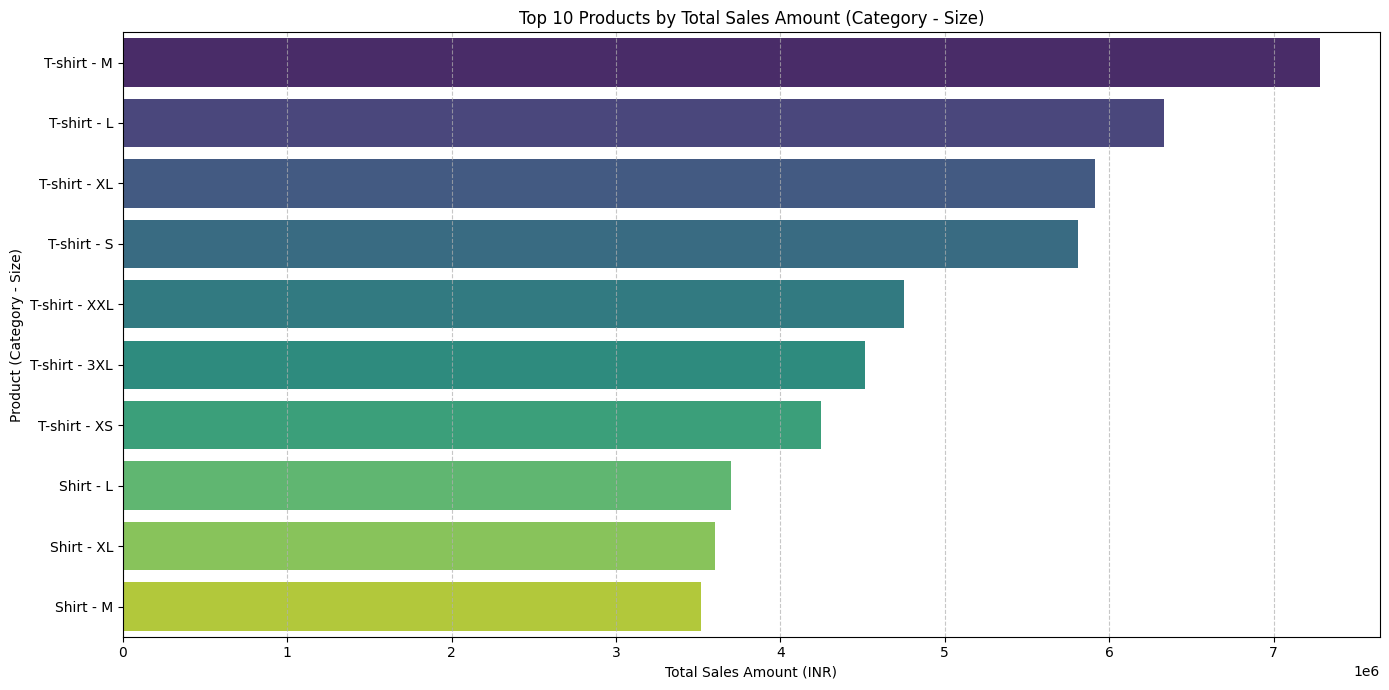

In [23]:
top_10_products_by_sales = product_sales.sort_values(by='Total_Sales_Amount', ascending=False).head(10)

plt.figure(figsize=(14, 7))
sns.barplot(
    x='Total_Sales_Amount',
    y=top_10_products_by_sales['Category'] + ' - ' + top_10_products_by_sales['Size'],
    data=top_10_products_by_sales,
    hue=top_10_products_by_sales['Category'] + ' - ' + top_10_products_by_sales['Size'], # Assign y to hue as suggested by warning
    palette='viridis',
    legend=False # Hide redundant legend
)
plt.title('Top 10 Products by Total Sales Amount (Category - Size)')
plt.xlabel('Total Sales Amount (INR)')
plt.ylabel('Product (Category - Size)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Reasoning**:
The previous code generated a `FutureWarning` from Seaborn about the usage of `palette` without a `hue` variable. To address this and align with future Seaborn versions, I will explicitly assign the `y` variable (the combined product name) to the `hue` parameter and set `legend=False` as suggested by the warning.



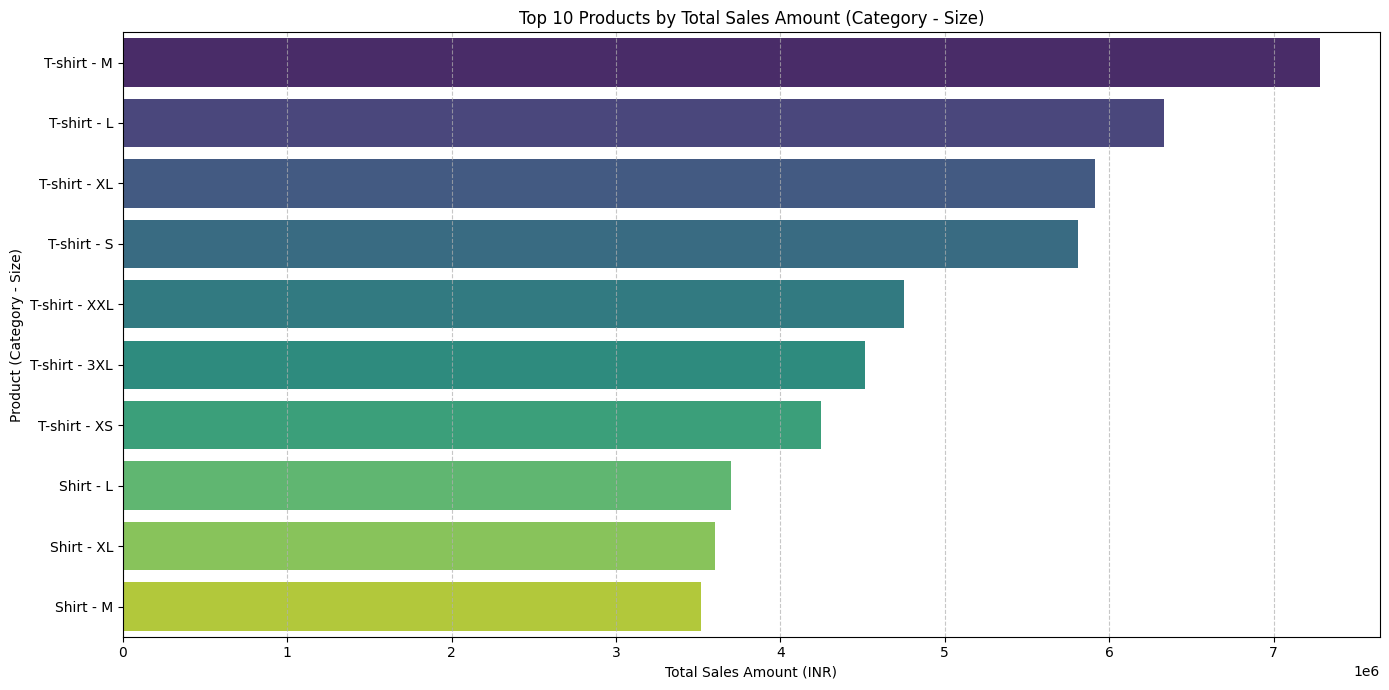

In [13]:
top_10_products_by_sales = product_sales.sort_values(by='Total_Sales_Amount', ascending=False).head(10)

plt.figure(figsize=(14, 7))
sns.barplot(
    x='Total_Sales_Amount',
    y=top_10_products_by_sales['Category'] + ' - ' + top_10_products_by_sales['Size'],
    data=top_10_products_by_sales,
    hue=top_10_products_by_sales['Category'] + ' - ' + top_10_products_by_sales['Size'], # Assign y to hue as suggested by warning
    palette='viridis',
    legend=False # Hide redundant legend
)
plt.title('Top 10 Products by Total Sales Amount (Category - Size)')
plt.xlabel('Total Sales Amount (INR)')
plt.ylabel('Product (Category - Size)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Fulfillment Method Effectiveness Analysis

### Subtask:
Investigate the effectiveness of different fulfillment methods by analyzing their contribution to total sales and order volume. Compare metrics across different fulfillment channels. Visualize the distribution of fulfillment methods with legends.


**Reasoning**:
I will group the DataFrame by the 'Fulfilment' column to calculate the total sales amount and total quantity sold for each method, then store and print these aggregated results as per instructions 1 and 2.



In [14]:
fulfillment_analysis = df.groupby('Fulfilment').agg(
    Total_Sales_Amount=('Amount', 'sum'),
    Total_Quantity_Sold=('Qty', 'sum')
).reset_index()

print("Fulfillment Method Effectiveness Analysis:")
print(fulfillment_analysis)

Fulfillment Method Effectiveness Analysis:
  Fulfilment  Total_Sales_Amount  Total_Quantity_Sold
0     Amazon         54072215.00                83481
1   Merchant         24089786.88                32278


**Reasoning**:
I will create a bar plot to visualize the 'Total Sales Amount' for each fulfillment method, adhering to instruction 3 of the subtask.



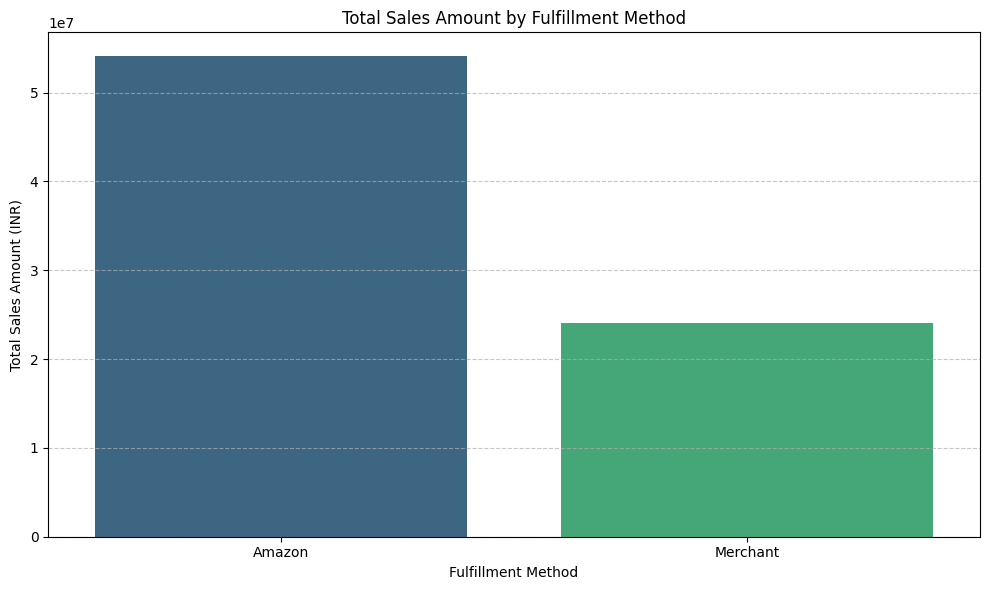

In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Fulfilment', y='Total_Sales_Amount', data=fulfillment_analysis, hue='Fulfilment', palette='viridis', legend=False)
plt.title('Total Sales Amount by Fulfillment Method')
plt.xlabel('Fulfillment Method')
plt.ylabel('Total Sales Amount (INR)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Reasoning**:
The previous code generated a `FutureWarning` because `palette` was used without assigning a `hue` variable. I will fix this by explicitly setting `hue='Fulfilment'` and `legend=False` in the `sns.barplot` call, as suggested by the warning, to ensure compatibility with future Seaborn versions.



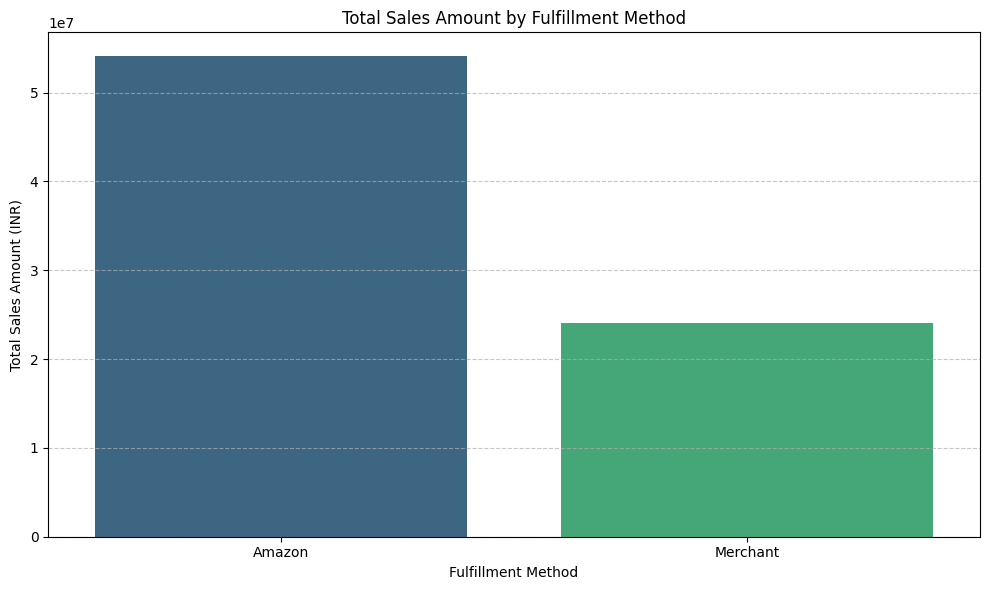

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Fulfilment', y='Total_Sales_Amount', data=fulfillment_analysis, hue='Fulfilment', palette='viridis', legend=False)
plt.title('Total Sales Amount by Fulfillment Method')
plt.xlabel('Fulfillment Method')
plt.ylabel('Total Sales Amount (INR)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Reasoning**:
I will create a bar plot to visualize the 'Total Quantity Sold' for each fulfillment method, adhering to instruction 4 of the subtask.



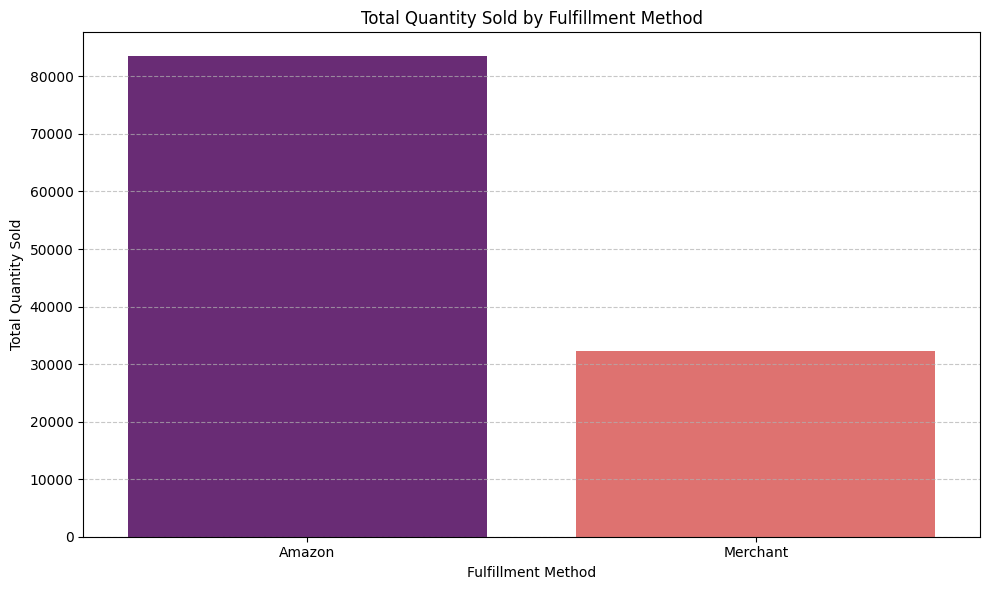

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Fulfilment', y='Total_Quantity_Sold', data=fulfillment_analysis, hue='Fulfilment', palette='magma', legend=False)
plt.title('Total Quantity Sold by Fulfillment Method')
plt.xlabel('Fulfillment Method')
plt.ylabel('Total Quantity Sold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Geographical Sales Distribution

### Subtask:
Analyze the geographical distribution of sales by state.


**Reasoning**:
I will group the DataFrame `df` by the 'ship-state' column and calculate the total sales amount and total quantity sold for each state, then store and print these aggregated results as per instruction 1 and 2.



In [18]:
state_sales = df.groupby('ship-state').agg(
    Total_Sales_Amount=('Amount', 'sum'),
    Total_Quantity_Sold=('Qty', 'sum')
).reset_index()

print("Geographical Sales Distribution by State:")
print(state_sales.head())

top_5_states_by_sales = state_sales.sort_values(by='Total_Sales_Amount', ascending=False).head(5)
print("\nTop 5 States by Total Sales Amount:")
print(top_5_states_by_sales)

Geographical Sales Distribution by State:
          ship-state  Total_Sales_Amount  Total_Quantity_Sold
0  ANDAMAN & NICOBAR           157424.62                  225
1     ANDHRA PRADESH          3198443.86                 4781
2                 AR              493.00                    1
3  ARUNACHAL PRADESH            94542.00                  129
4              ASSAM          1015181.20                 1478

Top 5 States by Total Sales Amount:
       ship-state  Total_Sales_Amount  Total_Quantity_Sold
27    MAHARASHTRA         13261933.90                20215
22      KARNATAKA         10421496.02                15793
56      TELANGANA          6880035.27                10194
58  UTTAR PRADESH          6798644.08                 9469
55     TAMIL NADU          6477109.53                10340


**Reasoning**:
I will create a bar plot to visualize the total sales amount for the top 10 states, as requested by instruction 3.



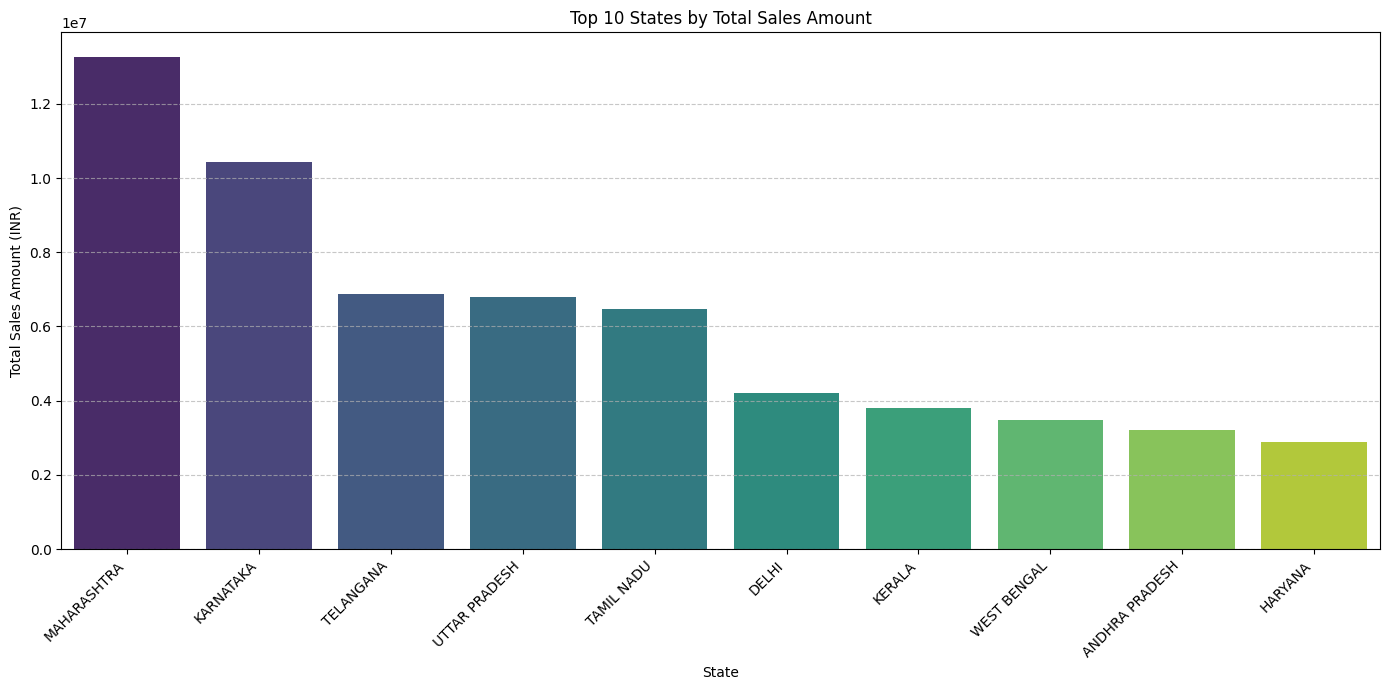

In [25]:
top_10_states_by_sales = state_sales.sort_values(by='Total_Sales_Amount', ascending=False).head(10)

plt.figure(figsize=(14, 7))
sns.barplot(
    x='ship-state',
    y='Total_Sales_Amount',
    data=top_10_states_by_sales,
    hue='ship-state', # Assign x to hue as suggested by warning
    palette='viridis',
    legend=False # Hide redundant legend
)
plt.title('Top 10 States by Total Sales Amount')
plt.xlabel('State')
plt.ylabel('Total Sales Amount (INR)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Reasoning**:
The previous code generated a `FutureWarning` because `palette` was used without assigning a `hue` variable. I will fix this by explicitly setting `hue='ship-state'` and `legend=False` in the `sns.barplot` call, as suggested by the warning, to ensure compatibility with future Seaborn versions.



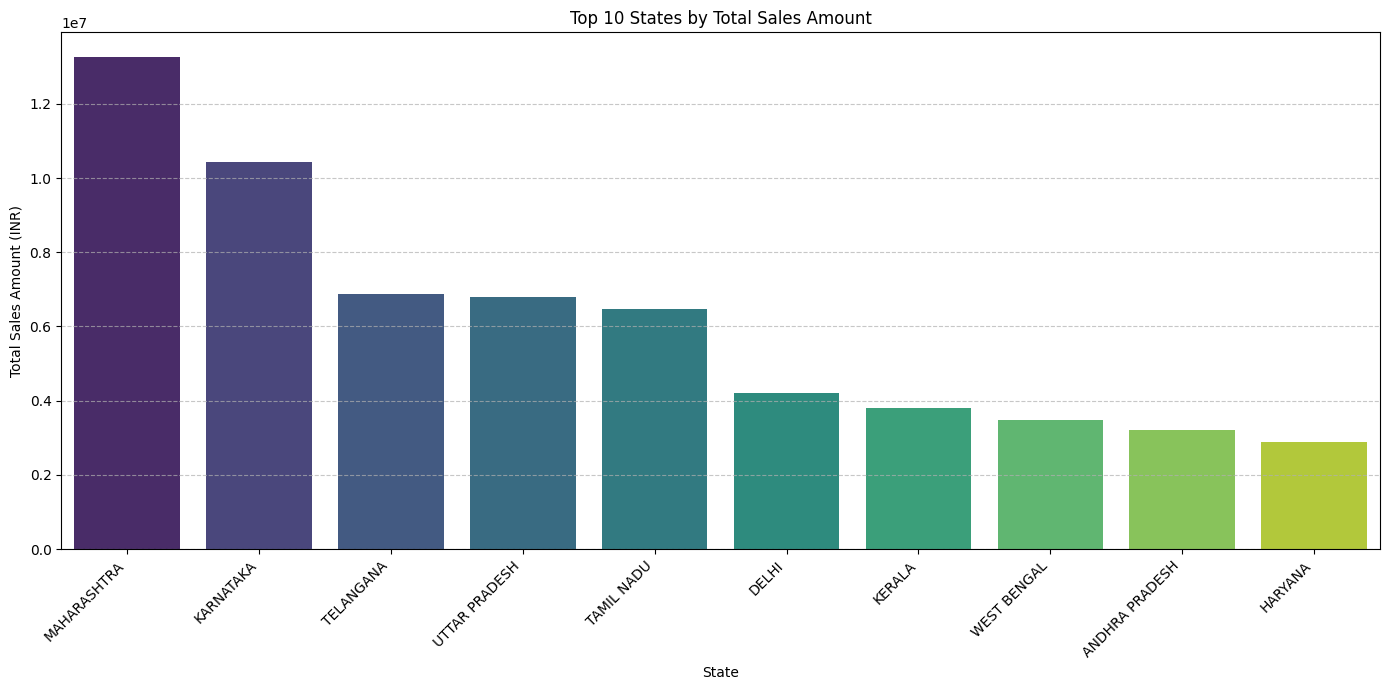

In [20]:
top_10_states_by_sales = state_sales.sort_values(by='Total_Sales_Amount', ascending=False).head(10)

plt.figure(figsize=(14, 7))
sns.barplot(
    x='ship-state',
    y='Total_Sales_Amount',
    data=top_10_states_by_sales,
    hue='ship-state', # Assign x to hue as suggested by warning
    palette='viridis',
    legend=False # Hide redundant legend
)
plt.title('Top 10 States by Total Sales Amount')
plt.xlabel('State')
plt.ylabel('Total Sales Amount (INR)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Final Task

### Subtask:
Summarize all key findings, insights, and patterns observed from the analysis. Provide actionable recommendations based on product preferences, customer behavior (inferred from location/sales patterns), and geographical sales distribution to optimize sales strategies, inventory management, and customer service.


## Summary:

### Data Analysis Key Findings

*   **Overall Sales Performance**: The dataset recorded a total sales amount of \$78,162,001.88 and a total quantity sold of 115,759 units.
*   **Sales Trends**:
    *   Daily sales exhibit fluctuations, with a notable example being March 31, 2022, sales of \$101,683.85, increasing to \$1,005,454.38 on April 3, 2022.
    *   Monthly sales showed a significant surge from March 2022 (\$101,683.85) to April 2022 (\$28,619,999.79), followed by a slight decrease in May (\$26,100,061.34) and June (\$23,340,256.90).
*   **Top-Performing Products and Categories**:
    *   "T-shirt" is the dominant product category by total sales amount, followed by "Shirt", "Blazzer", "Trousers", and "Perfume".
    *   The most sold sizes by quantity are "M", "L", "XL", "XXL", and "S".
    *   Top products by total sales amount (considering category and size) are predominantly various sizes of "T-shirt" (M, L, XL, S, XXL).
*   **Fulfillment Method Effectiveness**: 'Amazon' fulfillment significantly outperforms 'Merchant' fulfillment, contributing \$54,072,215.00 in total sales amount and 83,481 units in quantity sold, compared to 'Merchant's' \$24,089,786.88 and 32,278 units, respectively.
*   **Geographical Sales Distribution**:
    *   MAHARASHTRA leads in total sales with \$13,261,933.90.
    *   KARNATAKA is second with \$10,421,496.02.
    *   TELANGANA (\$6,880,035.27), UTTAR PRADESH (\$6,798,644.08), and TAMIL NADU (\$6,477,109.53) follow as the top-performing states.

### Insights or Next Steps

*   **Optimize Product Strategy**: Given the dominance of "T-shirt" and specific sizes (M, L, XL, XXL, S), focus on these core offerings through targeted promotions, ensuring consistent inventory levels, and potentially exploring variations or complementary products within these successful lines.
*   **Enhance Fulfillment and Geographical Targeting**: Investigate the reasons for the significant performance gap between 'Amazon' and 'Merchant' fulfillment to identify best practices from Amazon's operations that can be applied to merchant-fulfilled orders. Simultaneously, leverage the insights from geographical sales distribution to tailor marketing campaigns and inventory allocation for top-performing states like Maharashtra and Karnataka, while exploring growth opportunities in other regions.
